# PySDDR test run

In [1]:
# import the sddr module
from sddr import SDDR
import torch.nn as nn
from pandas import read_csv


Bad key "text.kerning_factor" on line 4 in
/home/haicu/dominik.thalmeier/anaconda3/envs/TorchKernel/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# First use case: A Simple GAM Poisson Distribution

### The user defines the data, distribution and training parameters in the next cell

Alternatively these parameters can be defined in a config file (for example see config.yaml)

In [2]:
data_path = './example_data/simple_gam/X.csv'
target_path = './example_data/simple_gam/Y.csv'

data = read_csv(data_path,delimiter=';')
target = read_csv(target_path)

output_dir = './outputs'

distribution  = 'Poisson'

formulas = {'rate': '~1+spline(x1, bs="bs",df=9)+spline(x2, bs="bs",df=9)+d1(x1)+d2(x2)'}
deep_models_dict = {
'd1': {
    'model': nn.Sequential(nn.Linear(1,15)),
    'output_shape': 15},
'd2': {
    'model': nn.Sequential(nn.Linear(1,3),nn.ReLU(), nn.Linear(3,8)),
    'output_shape': 8}
}

train_parameters = {
'batch_size': 1000,
'epochs': 2500,
'regularization_params': {'rate': 1}
}

### The sddr instance is initialized with the parameters given by the user in the previous step

In [3]:
sddr = SDDR(data=data,
            target=target,
            output_dir=output_dir,
            distribution=distribution,
            formulas=formulas,
            deep_models_dict=deep_models_dict,
            train_parameters=train_parameters)

### The SDDR network is trained with the data defined above

In [4]:
sddr.train()

Beginning training ...
Train Epoch: 0 	 Loss: 171.003983
Train Epoch: 100 	 Loss: 48.565971
Train Epoch: 200 	 Loss: 46.607327
Train Epoch: 300 	 Loss: 46.558624
Train Epoch: 400 	 Loss: 46.606640
Train Epoch: 500 	 Loss: 46.577747
Train Epoch: 600 	 Loss: 46.569698
Train Epoch: 700 	 Loss: 46.578045
Train Epoch: 800 	 Loss: 46.583641
Train Epoch: 900 	 Loss: 46.580780
Train Epoch: 1000 	 Loss: 46.579285
Train Epoch: 1100 	 Loss: 46.580555
Train Epoch: 1200 	 Loss: 46.581081
Train Epoch: 1300 	 Loss: 46.580616
Train Epoch: 1400 	 Loss: 46.580441
Train Epoch: 1500 	 Loss: 46.580616
Train Epoch: 1600 	 Loss: 46.580677
Train Epoch: 1700 	 Loss: 46.580624
Train Epoch: 1800 	 Loss: 46.580589
Train Epoch: 1900 	 Loss: 46.580612
Train Epoch: 2000 	 Loss: 46.580616
Train Epoch: 2100 	 Loss: 46.580605
Train Epoch: 2200 	 Loss: 46.580608
Train Epoch: 2300 	 Loss: 46.580608
Train Epoch: 2400 	 Loss: 46.580608


### Visualize the partial effects

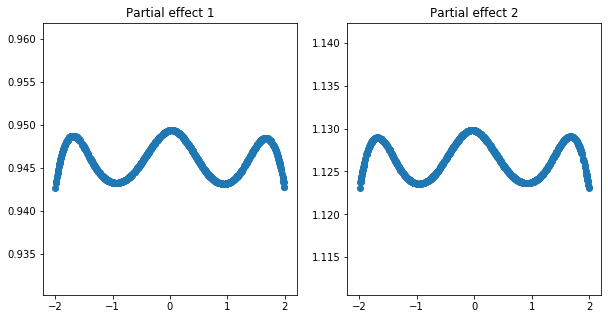

In [5]:
partial_effects = sddr.eval('rate')

# Second use case: GAMLSS - Normal Distribution

### The user defines the data, distribution and training parameters in the next cell

Alternatively these parameters can be defined in a config file (for example see config.yaml)

In [6]:
# second example
x_path = './example_data/gamlss/X.csv'
y_path = './example_data/gamlss/Y.csv'

data = read_csv(x_path,delimiter=';')
target = read_csv(y_path)

output_dir = './outputs'

distribution  = 'Normal'

formulas = {'loc': '~1+spline(x1, bs="bs", df=9)+spline(x2, bs="bs",df=9) + d1(x1)+d2(x2)',
            'scale': '~1 + spline(x3, bs="bs",df=9) + spline(x4, bs="bs",df=9)'
            }

deep_models_dict = {
'd1': {
    'model': nn.Sequential(nn.Linear(1,15)),
    'output_shape': 15},
'd2': {
    'model': nn.Sequential(nn.Linear(1,3),nn.ReLU(), nn.Linear(3,8)),
    'output_shape': 8}
}

train_parameters = {
'batch_size': 1000,
'epochs': 2500,
'regularization_params': {'loc':1, 'scale':1}
}

### The sddr instance is initialized with the parameters given by the user in the previous step

In [7]:
sddr = SDDR(data=data,
            target=target,
            output_dir=output_dir,
            distribution=distribution,
            formulas=formulas,
            deep_models_dict=deep_models_dict,
            train_parameters=train_parameters)

### The SDDR network is trained with the data defined above

In [8]:
sddr.train()

Beginning training ...
Train Epoch: 0 	 Loss: 223.961166
Train Epoch: 100 	 Loss: 2.865013
Train Epoch: 200 	 Loss: 2.807659
Train Epoch: 300 	 Loss: 2.976680
Train Epoch: 400 	 Loss: 3.126447
Train Epoch: 500 	 Loss: 3.264488
Train Epoch: 600 	 Loss: 3.282495
Train Epoch: 700 	 Loss: 3.221431
Train Epoch: 800 	 Loss: 3.205568
Train Epoch: 900 	 Loss: 3.227905
Train Epoch: 1000 	 Loss: 3.233298
Train Epoch: 1100 	 Loss: 3.224850
Train Epoch: 1200 	 Loss: 3.223290
Train Epoch: 1300 	 Loss: 3.226446
Train Epoch: 1400 	 Loss: 3.226875
Train Epoch: 1500 	 Loss: 3.225700
Train Epoch: 1600 	 Loss: 3.225600
Train Epoch: 1700 	 Loss: 3.226028
Train Epoch: 1800 	 Loss: 3.226037
Train Epoch: 1900 	 Loss: 3.225876
Train Epoch: 2000 	 Loss: 3.225874
Train Epoch: 2100 	 Loss: 3.225928
Train Epoch: 2200 	 Loss: 3.225922
Train Epoch: 2300 	 Loss: 3.225897
Train Epoch: 2400 	 Loss: 3.225896


### Visualize the partial effects

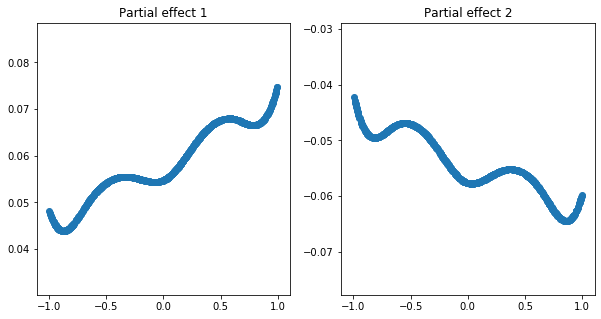

In [9]:
partial_effects = sddr.eval('loc')

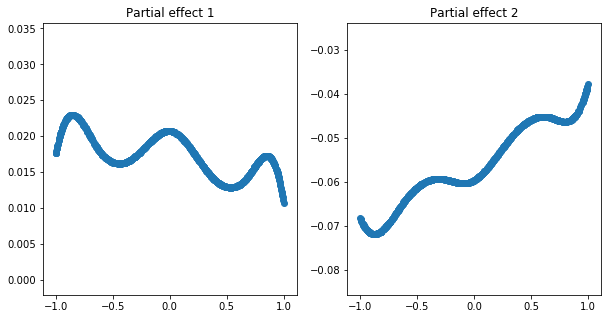

In [10]:
partial_effects = sddr.eval('scale')